# Dividir el dataset en conjunto de entrenamiento y de testing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [15]:
rnd = np.random.randn(len(data))

(array([ 2., 13., 15., 36., 42., 35., 31., 14.,  7.,  5.]),
 array([-2.4428295 , -1.922875  , -1.4029205 , -0.882966  , -0.3630115 ,
         0.156943  ,  0.67689749,  1.19685199,  1.71680649,  2.23676099,
         2.75671549]),
 <a list of 10 Patch objects>)

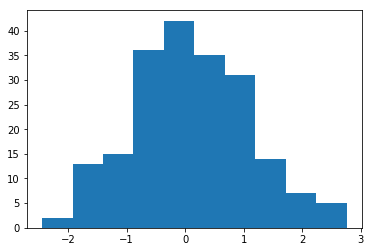

In [17]:
plt.hist(rnd)

In [19]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [22]:
len(training), len(testing)

(150, 50)

In [25]:
import statsmodels.formula.api as smf

In [26]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     670.1
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.34e-74
Time:                        15:54:56   Log-Likelihood:                -287.98
No. Observations:                 150   AIC:                             582.0
Df Residuals:                     147   BIC:                             591.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0194      0.329      9.165      0.000       2.368       3.671
TV             0.0450      0.002     28.185      0.000       0.042       0.048
Radio          0.1901      0.009     20.593      0.000       0.172       0.208
==============================================================================
Omnibus:                       61.420   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.763
Skew:                          -1.562   Prob(JB):                     1.26e-45
Kurtosis:                       7.829   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 3.0194 + 0.0450TV + 0.1901Radio

## Validación del modelo con el conjunto de testing

In [55]:
sales_pred = lm.predict(testing)
sales_pred.head()

0     20.549497
1     12.490885
5     12.706431
7     12.149060
18    10.027414
dtype: float64

In [35]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

149.67983721355915

In [53]:
# Recuerda que para hallar la desviacion estandar de los residuos debemos dividir entre el numero de variables predictoras - 1
num = 2 + 1
RSE = np.sqrt(SSD/(len(testing) - num))
RSE

1.7845664424510888

In [56]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.12551459012878668